# Numerical Optimization Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. (40%) Please try at least 4 different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.) Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
2. (40%) Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables
3. (20%) Please answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw2_110xxxxxx.ipynb)

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [11]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name, img_index):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations, img {}'.format(optimizer_name, len(iter_x),img_index))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [12]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.2, 'momentum':0.2, 'weight_decay':0.1},
        num_iter=5000,
    )

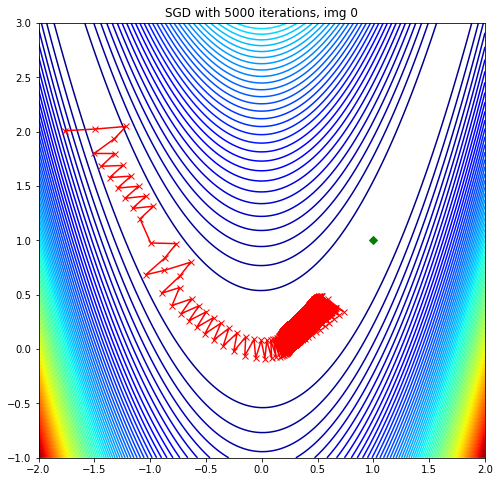

In [13]:
plot_rosenbrok(steps, optimizer_class.__name__,0)

In [14]:
printX(steps)

iteration 0: [-1.7659 2.0083]
iteration 1: [-1.4913 2.0240]
iteration 2: [-1.2161 2.0479]
iteration 3: [-1.3213 1.9346]
iteration 4: [-1.5018 1.7995]
iteration 5: [-1.3178 1.7986]
iteration 6: [-1.4375 1.6816]
iteration 7: [-1.2434 1.6890]
iteration 8: [-1.3635 1.5778]
iteration 9: [-1.1718 1.5911]
iteration 10: [-1.2927 1.4805]
iteration 11: [-1.1035 1.4981]
iteration 12: [-1.2246 1.3867]
iteration 13: [-1.0373 1.4074]
iteration 14: [-1.1582 1.2944]
iteration 15: [-0.9710 1.3137]
iteration 16: [-1.0909 1.1977]
iteration 17: [-0.9955 0.9760]
iteration 18: [-0.7650 0.9698]
iteration 19: [-0.8695 0.8374]
iteration 20: [-1.0397 0.6837]
iteration 21: [-0.8719 0.7243]
iteration 22: [-0.6379 0.7987]
iteration 23: [-0.7338 0.6717]
iteration 24: [-0.8984 0.5131]
iteration 25: [-0.7372 0.5657]
iteration 26: [-0.8043 0.4006]
iteration 27: [-0.6297 0.4618]
iteration 28: [-0.7243 0.3241]
iteration 29: [-0.5612 0.3993]
iteration 30: [-0.6541 0.2604]
iteration 31: [-0.4966 0.3433]
iteration 32: [-0.

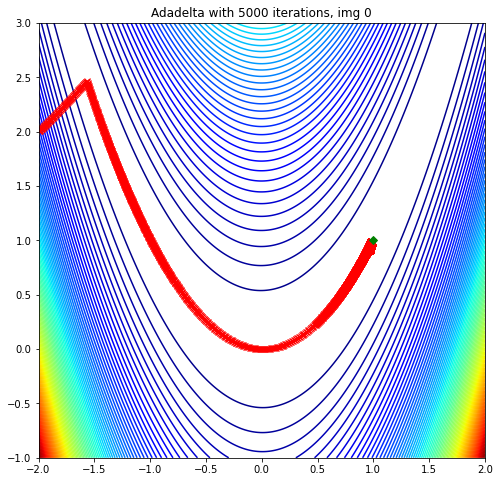

iteration 0: [-1.9968 2.0032]
iteration 1: [-1.9936 2.0064]
iteration 2: [-1.9903 2.0097]
iteration 3: [-1.9869 2.0131]
iteration 4: [-1.9836 2.0165]
iteration 5: [-1.9802 2.0199]
iteration 6: [-1.9767 2.0234]
iteration 7: [-1.9733 2.0268]
iteration 8: [-1.9698 2.0304]
iteration 9: [-1.9663 2.0339]
iteration 10: [-1.9627 2.0375]
iteration 11: [-1.9592 2.0411]
iteration 12: [-1.9556 2.0447]
iteration 13: [-1.9520 2.0483]
iteration 14: [-1.9484 2.0520]
iteration 15: [-1.9448 2.0557]
iteration 16: [-1.9412 2.0594]
iteration 17: [-1.9375 2.0631]
iteration 18: [-1.9339 2.0669]
iteration 19: [-1.9302 2.0707]
iteration 20: [-1.9265 2.0745]
iteration 21: [-1.9228 2.0783]
iteration 22: [-1.9190 2.0821]
iteration 23: [-1.9153 2.0860]
iteration 24: [-1.9116 2.0899]
iteration 25: [-1.9078 2.0938]
iteration 26: [-1.9040 2.0977]
iteration 27: [-1.9002 2.1016]
iteration 28: [-1.8964 2.1056]
iteration 29: [-1.8926 2.1096]
iteration 30: [-1.8888 2.1136]
iteration 31: [-1.8849 2.1176]
iteration 32: [-1.

In [15]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adadelta
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':1.0, 'rho':0.9,'eps':1e-06, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,0)
printX(steps)

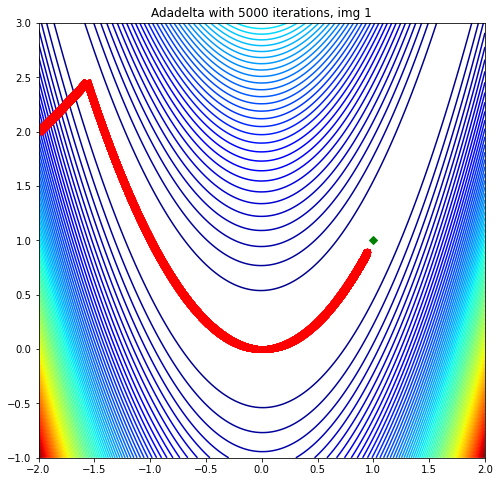

iteration 0: [-1.9998 2.0002]
iteration 1: [-1.9997 2.0003]
iteration 2: [-1.9995 2.0005]
iteration 3: [-1.9993 2.0007]
iteration 4: [-1.9992 2.0008]
iteration 5: [-1.9990 2.0010]
iteration 6: [-1.9988 2.0012]
iteration 7: [-1.9987 2.0013]
iteration 8: [-1.9985 2.0015]
iteration 9: [-1.9983 2.0017]
iteration 10: [-1.9981 2.0019]
iteration 11: [-1.9980 2.0020]
iteration 12: [-1.9978 2.0022]
iteration 13: [-1.9976 2.0024]
iteration 14: [-1.9974 2.0026]
iteration 15: [-1.9972 2.0028]
iteration 16: [-1.9971 2.0029]
iteration 17: [-1.9969 2.0031]
iteration 18: [-1.9967 2.0033]
iteration 19: [-1.9965 2.0035]
iteration 20: [-1.9963 2.0037]
iteration 21: [-1.9961 2.0039]
iteration 22: [-1.9959 2.0041]
iteration 23: [-1.9958 2.0042]
iteration 24: [-1.9956 2.0044]
iteration 25: [-1.9954 2.0046]
iteration 26: [-1.9952 2.0048]
iteration 27: [-1.9950 2.0050]
iteration 28: [-1.9948 2.0052]
iteration 29: [-1.9946 2.0054]
iteration 30: [-1.9944 2.0056]
iteration 31: [-1.9942 2.0058]
iteration 32: [-1.

In [17]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adadelta
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.05, 'rho':0.9,'eps':1e-06, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,1)
printX(steps)

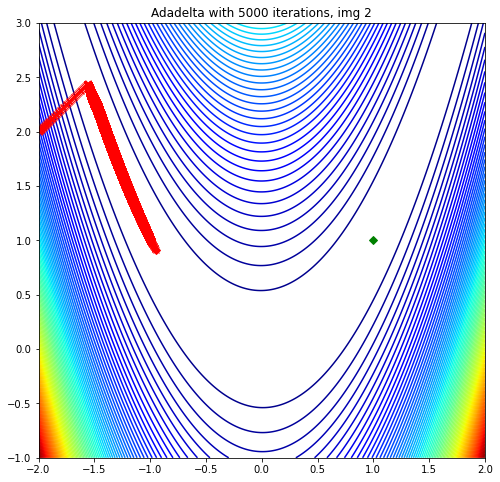

iteration 0: [-1.9989 2.0011]
iteration 1: [-1.9975 2.0025]
iteration 2: [-1.9958 2.0042]
iteration 3: [-1.9939 2.0061]
iteration 4: [-1.9917 2.0083]
iteration 5: [-1.9893 2.0107]
iteration 6: [-1.9868 2.0132]
iteration 7: [-1.9840 2.0160]
iteration 8: [-1.9812 2.0189]
iteration 9: [-1.9781 2.0219]
iteration 10: [-1.9749 2.0251]
iteration 11: [-1.9716 2.0284]
iteration 12: [-1.9682 2.0318]
iteration 13: [-1.9646 2.0354]
iteration 14: [-1.9609 2.0391]
iteration 15: [-1.9571 2.0430]
iteration 16: [-1.9531 2.0469]
iteration 17: [-1.9491 2.0510]
iteration 18: [-1.9449 2.0551]
iteration 19: [-1.9406 2.0594]
iteration 20: [-1.9363 2.0638]
iteration 21: [-1.9318 2.0683]
iteration 22: [-1.9272 2.0729]
iteration 23: [-1.9225 2.0775]
iteration 24: [-1.9178 2.0823]
iteration 25: [-1.9129 2.0872]
iteration 26: [-1.9080 2.0922]
iteration 27: [-1.9029 2.0972]
iteration 28: [-1.8978 2.1024]
iteration 29: [-1.8926 2.1076]
iteration 30: [-1.8873 2.1129]
iteration 31: [-1.8819 2.1183]
iteration 32: [-1.

In [22]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adadelta
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':1.0, 'rho':0.1,'eps':1e-06, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,2)
printX(steps)

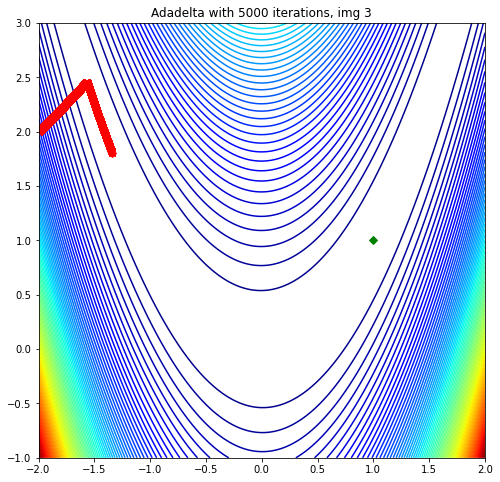

iteration 0: [-2.0000 2.0000]
iteration 1: [-1.9999 2.0001]
iteration 2: [-1.9999 2.0001]
iteration 3: [-1.9999 2.0001]
iteration 4: [-1.9998 2.0002]
iteration 5: [-1.9998 2.0002]
iteration 6: [-1.9998 2.0002]
iteration 7: [-1.9997 2.0003]
iteration 8: [-1.9997 2.0003]
iteration 9: [-1.9997 2.0003]
iteration 10: [-1.9996 2.0004]
iteration 11: [-1.9996 2.0004]
iteration 12: [-1.9996 2.0004]
iteration 13: [-1.9995 2.0005]
iteration 14: [-1.9995 2.0005]
iteration 15: [-1.9994 2.0006]
iteration 16: [-1.9994 2.0006]
iteration 17: [-1.9994 2.0006]
iteration 18: [-1.9993 2.0007]
iteration 19: [-1.9993 2.0007]
iteration 20: [-1.9993 2.0007]
iteration 21: [-1.9992 2.0008]
iteration 22: [-1.9992 2.0008]
iteration 23: [-1.9992 2.0008]
iteration 24: [-1.9991 2.0009]
iteration 25: [-1.9991 2.0009]
iteration 26: [-1.9990 2.0010]
iteration 27: [-1.9990 2.0010]
iteration 28: [-1.9990 2.0010]
iteration 29: [-1.9989 2.0011]
iteration 30: [-1.9989 2.0011]
iteration 31: [-1.9988 2.0012]
iteration 32: [-1.

In [23]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adadelta
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':1.0, 'rho':0.9,'eps':1e-10, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,3)
printX(steps)

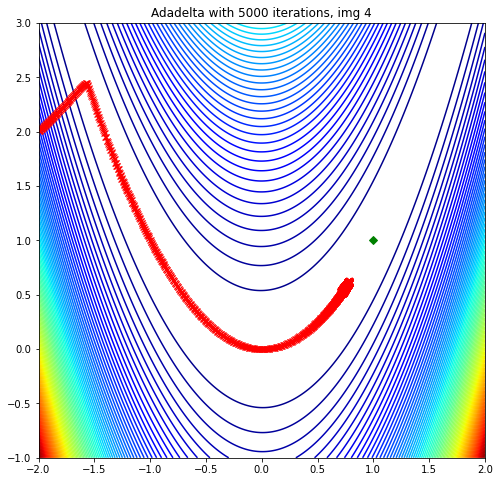

iteration 0: [-1.9968 2.0032]
iteration 1: [-1.9936 2.0064]
iteration 2: [-1.9903 2.0097]
iteration 3: [-1.9870 2.0130]
iteration 4: [-1.9836 2.0164]
iteration 5: [-1.9802 2.0198]
iteration 6: [-1.9767 2.0233]
iteration 7: [-1.9733 2.0267]
iteration 8: [-1.9698 2.0302]
iteration 9: [-1.9663 2.0338]
iteration 10: [-1.9628 2.0373]
iteration 11: [-1.9592 2.0409]
iteration 12: [-1.9557 2.0445]
iteration 13: [-1.9521 2.0481]
iteration 14: [-1.9485 2.0517]
iteration 15: [-1.9449 2.0554]
iteration 16: [-1.9413 2.0591]
iteration 17: [-1.9376 2.0628]
iteration 18: [-1.9340 2.0665]
iteration 19: [-1.9303 2.0702]
iteration 20: [-1.9266 2.0740]
iteration 21: [-1.9229 2.0777]
iteration 22: [-1.9192 2.0815]
iteration 23: [-1.9155 2.0854]
iteration 24: [-1.9118 2.0892]
iteration 25: [-1.9080 2.0930]
iteration 26: [-1.9043 2.0969]
iteration 27: [-1.9005 2.1008]
iteration 28: [-1.8967 2.1047]
iteration 29: [-1.8929 2.1087]
iteration 30: [-1.8891 2.1126]
iteration 31: [-1.8853 2.1166]
iteration 32: [-1.

In [24]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adadelta
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':1.0, 'rho':0.9,'eps':1e-06, 'weight_decay':0.1},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,4)
printX(steps)

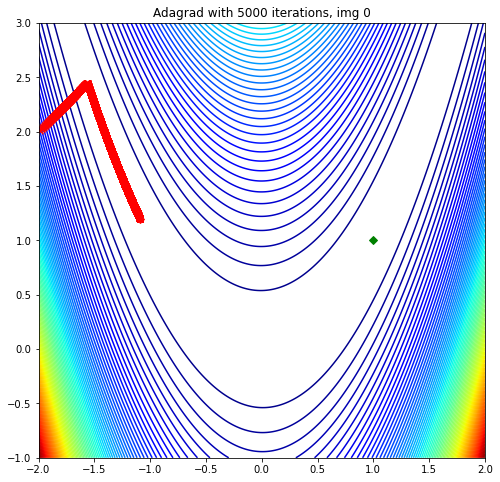

iteration 0: [-1.9900 2.0100]
iteration 1: [-1.9829 2.0171]
iteration 2: [-1.9772 2.0229]
iteration 3: [-1.9722 2.0279]
iteration 4: [-1.9677 2.0324]
iteration 5: [-1.9636 2.0365]
iteration 6: [-1.9598 2.0403]
iteration 7: [-1.9563 2.0439]
iteration 8: [-1.9530 2.0472]
iteration 9: [-1.9498 2.0504]
iteration 10: [-1.9468 2.0535]
iteration 11: [-1.9439 2.0564]
iteration 12: [-1.9411 2.0592]
iteration 13: [-1.9385 2.0619]
iteration 14: [-1.9359 2.0645]
iteration 15: [-1.9334 2.0670]
iteration 16: [-1.9310 2.0695]
iteration 17: [-1.9286 2.0719]
iteration 18: [-1.9263 2.0742]
iteration 19: [-1.9241 2.0765]
iteration 20: [-1.9219 2.0787]
iteration 21: [-1.9198 2.0808]
iteration 22: [-1.9177 2.0830]
iteration 23: [-1.9156 2.0850]
iteration 24: [-1.9137 2.0871]
iteration 25: [-1.9117 2.0891]
iteration 26: [-1.9098 2.0910]
iteration 27: [-1.9079 2.0929]
iteration 28: [-1.9060 2.0948]
iteration 29: [-1.9042 2.0967]
iteration 30: [-1.9024 2.0985]
iteration 31: [-1.9006 2.1003]
iteration 32: [-1.

In [26]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.01, 'lr_decay':0, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,0)
printX(steps)

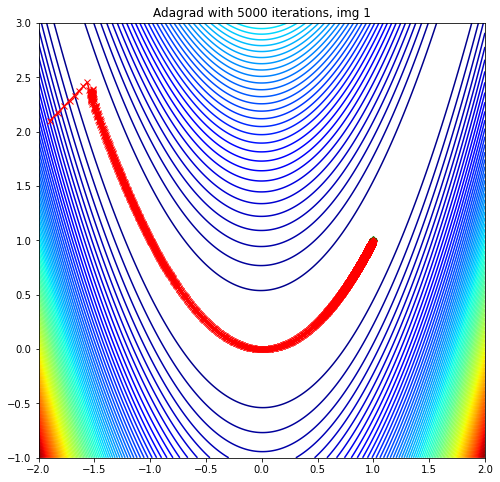

iteration 0: [-1.9000 2.1000]
iteration 1: [-1.8294 2.1723]
iteration 2: [-1.7718 2.2323]
iteration 3: [-1.7220 2.2847]
iteration 4: [-1.6775 2.3320]
iteration 5: [-1.6368 2.3755]
iteration 6: [-1.5993 2.4158]
iteration 7: [-1.5640 2.4530]
iteration 8: [-1.5445 2.3790]
iteration 9: [-1.5109 2.3914]
iteration 10: [-1.5413 2.3630]
iteration 11: [-1.5111 2.3790]
iteration 12: [-1.5389 2.3519]
iteration 13: [-1.5112 2.3685]
iteration 14: [-1.5369 2.3424]
iteration 15: [-1.5111 2.3591]
iteration 16: [-1.5352 2.3339]
iteration 17: [-1.5109 2.3505]
iteration 18: [-1.5337 2.3261]
iteration 19: [-1.5107 2.3425]
iteration 20: [-1.5323 2.3187]
iteration 21: [-1.5104 2.3349]
iteration 22: [-1.5310 2.3116]
iteration 23: [-1.5101 2.3274]
iteration 24: [-1.5297 2.3046]
iteration 25: [-1.5097 2.3201]
iteration 26: [-1.5285 2.2975]
iteration 27: [-1.5092 2.3127]
iteration 28: [-1.5272 2.2901]
iteration 29: [-1.5086 2.3049]
iteration 30: [-1.5258 2.2819]
iteration 31: [-1.5078 2.2963]
iteration 32: [-1.

In [28]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.1, 'lr_decay':0, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,1)
printX(steps)

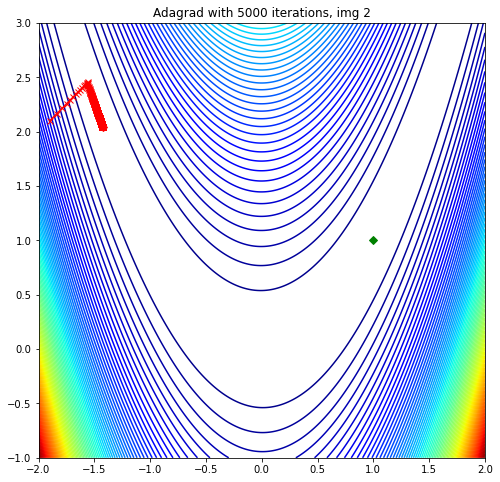

iteration 0: [-1.9000 2.1000]
iteration 1: [-1.8358 2.1658]
iteration 2: [-1.7878 2.2156]
iteration 3: [-1.7495 2.2558]
iteration 4: [-1.7177 2.2893]
iteration 5: [-1.6906 2.3180]
iteration 6: [-1.6670 2.3429]
iteration 7: [-1.6463 2.3649]
iteration 8: [-1.6279 2.3845]
iteration 9: [-1.6113 2.4021]
iteration 10: [-1.5963 2.4179]
iteration 11: [-1.5826 2.4321]
iteration 12: [-1.5700 2.4447]
iteration 13: [-1.5582 2.4542]
iteration 14: [-1.5684 2.4381]
iteration 15: [-1.5582 2.4462]
iteration 16: [-1.5667 2.4303]
iteration 17: [-1.5578 2.4372]
iteration 18: [-1.5627 2.4174]
iteration 19: [-1.5547 2.4227]
iteration 20: [-1.5483 2.4109]
iteration 21: [-1.5541 2.3992]
iteration 22: [-1.5472 2.4029]
iteration 23: [-1.5489 2.3882]
iteration 24: [-1.5426 2.3909]
iteration 25: [-1.5465 2.3806]
iteration 26: [-1.5408 2.3830]
iteration 27: [-1.5423 2.3720]
iteration 28: [-1.5369 2.3736]
iteration 29: [-1.5403 2.3658]
iteration 30: [-1.5354 2.3673]
iteration 31: [-1.5376 2.3591]
iteration 32: [-1.

In [30]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.1, 'lr_decay':0.1, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,2)
printX(steps)

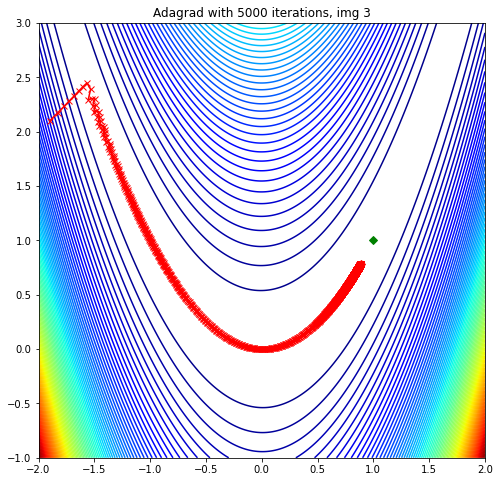

iteration 0: [-1.9000 2.1000]
iteration 1: [-1.8297 2.1720]
iteration 2: [-1.7725 2.2318]
iteration 3: [-1.7231 2.2842]
iteration 4: [-1.6790 2.3316]
iteration 5: [-1.6388 2.3749]
iteration 6: [-1.6017 2.4143]
iteration 7: [-1.5670 2.4476]
iteration 8: [-1.5336 2.3901]
iteration 9: [-1.5555 2.2931]
iteration 10: [-1.5253 2.3024]
iteration 11: [-1.4960 2.3034]
iteration 12: [-1.5160 2.2360]
iteration 13: [-1.4888 2.2424]
iteration 14: [-1.5068 2.1817]
iteration 15: [-1.4810 2.1883]
iteration 16: [-1.4553 2.1799]
iteration 17: [-1.4727 2.1330]
iteration 18: [-1.4488 2.1372]
iteration 19: [-1.4651 2.0929]
iteration 20: [-1.4423 2.0982]
iteration 21: [-1.4564 2.0507]
iteration 22: [-1.4345 2.0562]
iteration 23: [-1.4122 2.0466]
iteration 24: [-1.4272 2.0118]
iteration 25: [-1.4063 2.0148]
iteration 26: [-1.4206 1.9807]
iteration 27: [-1.4005 1.9849]
iteration 28: [-1.4137 1.9496]
iteration 29: [-1.3942 1.9544]
iteration 30: [-1.3997 1.9055]
iteration 31: [-1.3806 1.9102]
iteration 32: [-1.

In [31]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.1, 'lr_decay':0, 'weight_decay':0.1},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,3)
printX(steps)

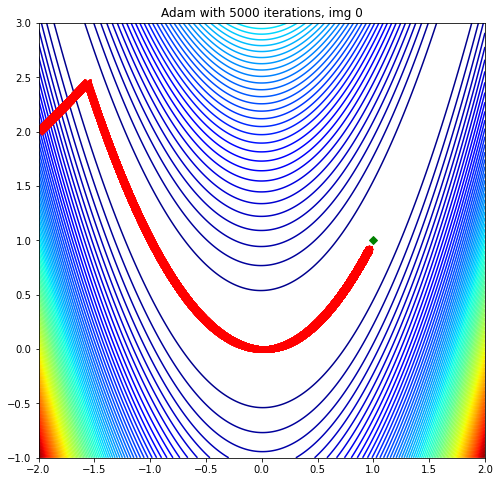

iteration 0: [-1.9990 2.0010]
iteration 1: [-1.9980 2.0020]
iteration 2: [-1.9970 2.0030]
iteration 3: [-1.9960 2.0040]
iteration 4: [-1.9950 2.0050]
iteration 5: [-1.9940 2.0060]
iteration 6: [-1.9930 2.0070]
iteration 7: [-1.9920 2.0080]
iteration 8: [-1.9910 2.0090]
iteration 9: [-1.9900 2.0100]
iteration 10: [-1.9890 2.0110]
iteration 11: [-1.9880 2.0120]
iteration 12: [-1.9870 2.0130]
iteration 13: [-1.9860 2.0140]
iteration 14: [-1.9850 2.0150]
iteration 15: [-1.9840 2.0160]
iteration 16: [-1.9830 2.0170]
iteration 17: [-1.9820 2.0180]
iteration 18: [-1.9810 2.0190]
iteration 19: [-1.9800 2.0200]
iteration 20: [-1.9790 2.0210]
iteration 21: [-1.9780 2.0220]
iteration 22: [-1.9770 2.0230]
iteration 23: [-1.9760 2.0240]
iteration 24: [-1.9750 2.0250]
iteration 25: [-1.9740 2.0260]
iteration 26: [-1.9730 2.0270]
iteration 27: [-1.9720 2.0280]
iteration 28: [-1.9710 2.0290]
iteration 29: [-1.9700 2.0300]
iteration 30: [-1.9690 2.0310]
iteration 31: [-1.9680 2.0320]
iteration 32: [-1.

In [34]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.001, 'betas':(0.9,0.999),'eps':1e-08, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,0)
printX(steps)

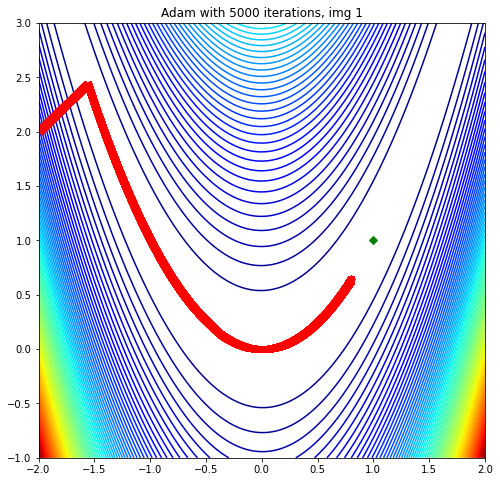

iteration 0: [-1.9990 2.0010]
iteration 1: [-1.9980 2.0020]
iteration 2: [-1.9970 2.0030]
iteration 3: [-1.9960 2.0040]
iteration 4: [-1.9950 2.0050]
iteration 5: [-1.9940 2.0060]
iteration 6: [-1.9930 2.0070]
iteration 7: [-1.9920 2.0080]
iteration 8: [-1.9910 2.0090]
iteration 9: [-1.9900 2.0100]
iteration 10: [-1.9890 2.0110]
iteration 11: [-1.9880 2.0120]
iteration 12: [-1.9870 2.0130]
iteration 13: [-1.9860 2.0140]
iteration 14: [-1.9850 2.0150]
iteration 15: [-1.9840 2.0160]
iteration 16: [-1.9830 2.0170]
iteration 17: [-1.9820 2.0180]
iteration 18: [-1.9810 2.0190]
iteration 19: [-1.9800 2.0200]
iteration 20: [-1.9790 2.0210]
iteration 21: [-1.9780 2.0220]
iteration 22: [-1.9770 2.0230]
iteration 23: [-1.9760 2.0240]
iteration 24: [-1.9750 2.0250]
iteration 25: [-1.9740 2.0260]
iteration 26: [-1.9730 2.0270]
iteration 27: [-1.9720 2.0280]
iteration 28: [-1.9710 2.0290]
iteration 29: [-1.9700 2.0300]
iteration 30: [-1.9690 2.0310]
iteration 31: [-1.9680 2.0320]
iteration 32: [-1.

In [37]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.001, 'betas':(0.01,0.01),'eps':1e-08, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,1)
printX(steps)

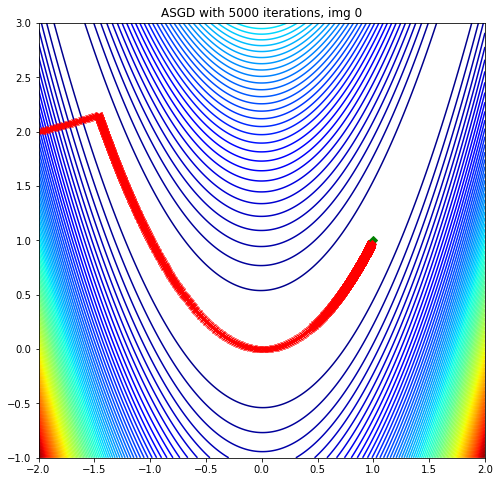

iteration 0: [-1.9903 2.0024]
iteration 1: [-1.9806 2.0048]
iteration 2: [-1.9709 2.0073]
iteration 3: [-1.9612 2.0097]
iteration 4: [-1.9515 2.0122]
iteration 5: [-1.9418 2.0147]
iteration 6: [-1.9321 2.0171]
iteration 7: [-1.9224 2.0196]
iteration 8: [-1.9128 2.0221]
iteration 9: [-1.9031 2.0246]
iteration 10: [-1.8934 2.0272]
iteration 11: [-1.8837 2.0297]
iteration 12: [-1.8741 2.0323]
iteration 13: [-1.8644 2.0348]
iteration 14: [-1.8547 2.0374]
iteration 15: [-1.8451 2.0400]
iteration 16: [-1.8354 2.0426]
iteration 17: [-1.8257 2.0452]
iteration 18: [-1.8161 2.0478]
iteration 19: [-1.8065 2.0505]
iteration 20: [-1.7968 2.0531]
iteration 21: [-1.7872 2.0558]
iteration 22: [-1.7775 2.0585]
iteration 23: [-1.7679 2.0611]
iteration 24: [-1.7583 2.0638]
iteration 25: [-1.7486 2.0666]
iteration 26: [-1.7390 2.0693]
iteration 27: [-1.7294 2.0720]
iteration 28: [-1.7198 2.0748]
iteration 29: [-1.7102 2.0775]
iteration 30: [-1.7006 2.0803]
iteration 31: [-1.6910 2.0831]
iteration 32: [-1.

In [38]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.ASGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.01, 'lambd':0.0001,'alpha':0.75,'t0':1000000.0, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,0)
printX(steps)

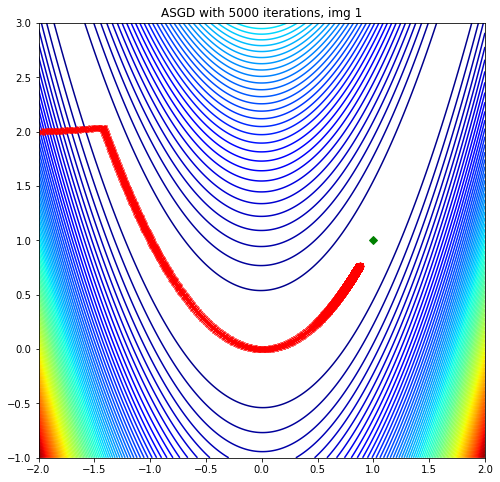

iteration 0: [-1.9883 2.0004]
iteration 1: [-1.9766 2.0008]
iteration 2: [-1.9650 2.0013]
iteration 3: [-1.9533 2.0017]
iteration 4: [-1.9417 2.0022]
iteration 5: [-1.9301 2.0027]
iteration 6: [-1.9186 2.0032]
iteration 7: [-1.9070 2.0037]
iteration 8: [-1.8955 2.0042]
iteration 9: [-1.8840 2.0047]
iteration 10: [-1.8726 2.0053]
iteration 11: [-1.8611 2.0058]
iteration 12: [-1.8497 2.0064]
iteration 13: [-1.8383 2.0070]
iteration 14: [-1.8269 2.0076]
iteration 15: [-1.8156 2.0082]
iteration 16: [-1.8043 2.0088]
iteration 17: [-1.7930 2.0095]
iteration 18: [-1.7817 2.0101]
iteration 19: [-1.7704 2.0108]
iteration 20: [-1.7592 2.0115]
iteration 21: [-1.7480 2.0122]
iteration 22: [-1.7368 2.0129]
iteration 23: [-1.7256 2.0136]
iteration 24: [-1.7145 2.0143]
iteration 25: [-1.7034 2.0151]
iteration 26: [-1.6923 2.0158]
iteration 27: [-1.6812 2.0166]
iteration 28: [-1.6702 2.0174]
iteration 29: [-1.6592 2.0182]
iteration 30: [-1.6482 2.0190]
iteration 31: [-1.6372 2.0199]
iteration 32: [-1.

In [41]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.ASGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.01, 'lambd':0.1,'alpha':0.75,'t0':1000000.0, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,1)
printX(steps)

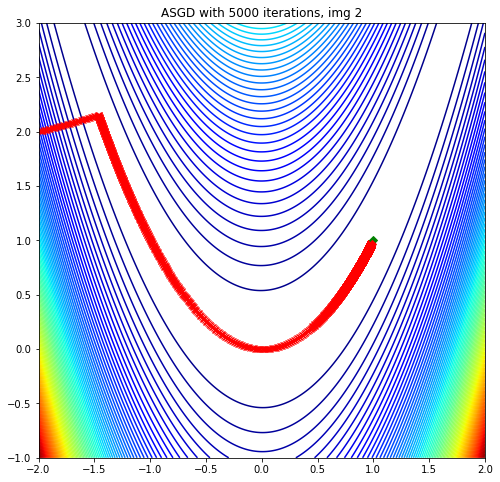

iteration 0: [-1.9903 2.0024]
iteration 1: [-1.9806 2.0048]
iteration 2: [-1.9709 2.0073]
iteration 3: [-1.9612 2.0097]
iteration 4: [-1.9515 2.0122]
iteration 5: [-1.9418 2.0147]
iteration 6: [-1.9321 2.0171]
iteration 7: [-1.9224 2.0196]
iteration 8: [-1.9128 2.0221]
iteration 9: [-1.9031 2.0246]
iteration 10: [-1.8934 2.0272]
iteration 11: [-1.8837 2.0297]
iteration 12: [-1.8741 2.0323]
iteration 13: [-1.8644 2.0348]
iteration 14: [-1.8547 2.0374]
iteration 15: [-1.8451 2.0400]
iteration 16: [-1.8354 2.0426]
iteration 17: [-1.8257 2.0452]
iteration 18: [-1.8161 2.0478]
iteration 19: [-1.8065 2.0505]
iteration 20: [-1.7968 2.0531]
iteration 21: [-1.7872 2.0558]
iteration 22: [-1.7775 2.0585]
iteration 23: [-1.7679 2.0611]
iteration 24: [-1.7583 2.0638]
iteration 25: [-1.7486 2.0666]
iteration 26: [-1.7390 2.0693]
iteration 27: [-1.7294 2.0720]
iteration 28: [-1.7198 2.0748]
iteration 29: [-1.7102 2.0775]
iteration 30: [-1.7006 2.0803]
iteration 31: [-1.6910 2.0831]
iteration 32: [-1.

In [49]:
initial_state = np.array([-2,2])
optimizer_class = torch.optim.ASGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        {'lr':0.01, 'lambd':0.0001,'alpha':0.75,'t0':10.0, 'weight_decay':0},
        num_iter=5000,
    )
plot_rosenbrok(steps, optimizer_class.__name__,2)
printX(steps)

## Report

Type your report here.（中英文皆可）

我在此次作業中應用了Adadelta，Adagrad，Adam，ASGD  
img0中是應用default參數作爲基地，之後參數的改變會與img 0作對比  
Adadelta是Adagrad的改進，Adadelta分母中采用距離當前時間點比較近的纍計項，這可以避免在訓練後期學習率過低  
其中，它的lr并非是常見的學習率，而是delta被應用到參數更新前對它縮放的係數。我在Adadelta img1中減少了lr的值，所以到後期進行了縮放，最終無法到達[1,1];rho是計算平方梯度運行的平均值係數，見Adadelta img2，減少之後也會無法到達[1,1]，eps是數值穩定器，會加到分母裏，見Adadelta img3，降低數值穩定性后無法到達[1,1]，weight_decay是L2的懲罰，增加後每一步都會有L2懲罰，故無法到達[1,1]，見Adadelta img4  
Adagrad是一種自適應優化方法，是自適應的為各個參數分配不同的學習率。這個學習率的變化，會收到梯度大小和迭代次數的影響。梯度越大，學習率越小，梯度越小，學習率越大，也有一個缺點，那就是訓練後期學習率過小，因爲Adagrad纍加之前所有的梯度平方作爲分母；  在這裏，lr作爲學習率，見Adagrad img1，lr_decay是學習率衰減，見Adagrad img2，因爲學習率衰減故無法到達[1,1]，weight_decay是L2懲罰，與Adadelta一樣  
Adam（Adaptive Moment Estimation）優化方法，Adam是一種自適應學習率的優化方法，Adam利用梯度的一階矩估計和二階矩估計動態的調整學習率。Adam是結合了Momentum和RMSprop，並進行了偏差修正。  Adam的lr是學習率，betas是用於計算梯度以及梯度平方的運行平均值的係數，見Adam img1，下調了betas后，係數變低，就到不了[-1,1]，eps和Adadelta一樣是爲了數值穩定加到分母裏的項，weight_decay是L2懲罰
ASGD表示隨機平均梯度下降(Averaged Stochastic Gradient Descent)，簡單地說ASGD就是用空間換時間的一種SGD  
lr是學習率，lambd是衰減項，見ASGD img1，升高lambd，就會更快的衰減，沒法到[-1,1]，aplha是eta更新的參數，t0代表從哪次開始平均化，見ASGD img2，從第十次開始平均化，最後的weight_decay是L2懲罰。


  
(a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
這兩個的區別是迭代方式的區別，SG中必須要遍歷訓練集中的所有樣本才能在特定的迭代中對參數進行一次更新，但是另一方面，在SGD中，只能在使用一個子集或是在特定迭代中對參數進行更新，因此，如果訓練樣本的數量非常大，那麽用GD就會花費太多時間，用SGD就會更快，只需要一個訓練樣本就可以自我迭代，但是SGD的誤差函數最小化程度不如GD，SGD可能會在最佳值的近似附近震蕩。在我們的案例中，SG需要全部找一遍才可以迭代，但是SGD只需要隨機找一個點就可以開始了  
(b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
現在找超參數優化方法一般有這麽幾種：
1、手動搜索 2、隨機搜索 3、網格搜索 4、自動超參數調整 5、人工神經網絡（ANN）調整  
這裏只能使用手動搜索  
我的方法是先用default參數試試
如果沒到最佳值就可以稍微增加學習率。基本上lr越高，速率越快，迭代的也越快，但也有可能找不准minimum point，這種時候可以修改lr_decay或者weight_decay來稍微衰減學習率  

